### Daegu Apartment

[Sumber Data Daegu Apartment](https://drive.google.com/file/d/1MPDotXZNmiq6geRi8BkGd-fjttzoyTxW/view?usp=sharing)

### Contents

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

***

### Business Problem Understanding

**Context**



Traveloki adalah sebuah aplikasi penyedia jasa layanan servis sewa akomodasi. Traveloki berperan sebagai pihak ketiga antara tuan rumah dan calon penyewa seperti marketplace pada umumnya. Traveloki didirikan pada tahun 2013 dan wilayah operasinya sudah tersebar di 137+ negara. Korea Selatan menjadi salah satu dari sekian negara yang turut andil dalam pertumbuhan bisnis Traveloki, dimana banyak turis yang berkunjung ke negara tersebut dan kota Daegu menjadi tempat yang paling banyak dikunjungi di Korea Selatan. Tentunya turis membutuhkan penginapan di kota tersebut dan diharapkan Traveloki mampu membantu para turis untuk menemukan penginapan sesuai keinginannya.

Untuk menjadi tuan rumah Traveloki, caranya sangat mudah, hanya dengan membuat akun pada aplikasi Traveloki dan memilih opsi sebagai 'host'. Lalu, tuan rumah bisa mulai memasukkan daftar propertinya beserta harga sewanya. Akan tetapi, model bisnis Traveloki membebaskan tuan rumah untuk menentukan harga sewa propertinya, yang mana hal ini tentu saja cukup menyulitkan bagi tuan rumah. Jika harganya terlalu mahal dibanding properti-properti lain dengan fitur sejenis di sekitar areanya, tentu akan sedikit yang akan menyewa propertinya. Sebaliknya, jika terlalu murah, tentu tuan rumah tidak akan mendapatkan profit yang sepadan. Banyak faktor yang memengaruhi nilai dari suatu properti. Tentunya hal tersebut perlu dipahami juga oleh sang tuan rumah karena berhubungan dengan profit yang bisa didapatkan.

**Problem Statement**

Salah satu tantangan terbesar bagi perusahaan seperti Traveloki adalah pemecahan masalah untuk dapat memiliki model bisnis yang menguntungkan secara finansial bagi pemilik properti, serta dapat memberikan pengalaman positif terhadap penyewa akomodasi.

Mengingat Traveloki menawarkan kebebasan penuh kepada tuan rumah untuk menentukan harga properti mereka, dengan hanya memberikan petunjuk minimal yang memungkinkan tuan rumah membandingkan tempat serupa di lingkungan mereka untuk mendapatkan harga yang kompetitif. Tuan rumah pun dapat memasukkan harga yang lebih tinggi untuk fasilitas tambahan apa pun yang mereka anggap perlu. Dengan bertambahnya jumlah tuan rumah yang menggunakan Traveloki, menentukan harga yang tepat untuk dapat tetap kompetitif di lingkungan sekitar tuan rumah sangatlah penting.

**Goals**

Berdasarkan permasalahan tersebut, Traveloki tentu perlu memiliki tool yang dapat memprediksi serta membantu klien mereka (dalam hal ini tuan rumah) untuk dapat menentukan harga sewa properti yang tepat untuk tiap properti yang baru akan mereka sewakan. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu properti, seperti luas bangunan, jumlah fasilitas,dll dapat menambah keakuratan prediksi harga sewa, yang mana dapat mendatangkan profit bagi tuan rumah, dan juga tentunya masih terjangkau bagi penyewa.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu properti dengan yang lainnya. Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan tool prediksi harga sewa akomodasi yang baru masuk dalam daftar Traveloki, yang mana akan berguna untuk tuan rumah (host) dalam menentukan harga sewa listing-nya.

**Metrics Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan.

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

### Data Understanding

- Dataset merupakan data spesifikasi apartment di kota Daegu.
- Setiap baris data merepresentasikan informasi terkait properti.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Type of Hallway |
| TimeToSubway | Object | Time taken from apartment to subway station |
| SubwayStation | Object | The name of the nearest  subway station from the apartment |
| N_FacilitiesNearBy(ETC) | Float | Number of other nearby facilities |
| N_FacilitiesNearBy(PublicOffice) | Float | Number of nearest public office facilities |
| N_SchoolNearBy(University) | Float | Number of nearest universities |
| N_Parkinglot(Basement) | Float | Maximum number of vehicles in the parking lot |
| YearBuilt | Integer | Year of establishment of the apartment |
| N_FacilitiesInApt | Integer | Number of facilities in the apartment |
| Size(sqf) | Integer | Building area in square foot |
| SalePrice | Integer | Price in won |

<br>

In [212]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [213]:
# Load Datasets
data = pd.read_csv('data_daegu_apartment.csv')
data.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


**Exploratory Data Analysis**

**General Info**

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


**Unique Values of Categorical Variable**

In [215]:
data['HallwayType'].value_counts()

terraced    2528
mixed       1131
corridor     464
Name: HallwayType, dtype: int64

In [216]:
data['SubwayStation'].value_counts()

Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: SubwayStation, dtype: int64

In [217]:
data['TimeToSubway'].value_counts()

0-5min                1953
5min~10min             787
15min~20min            629
10min~15min            583
no_bus_stop_nearby     171
Name: TimeToSubway, dtype: int64

**Distribution Plot of Daegu Apartment Price**

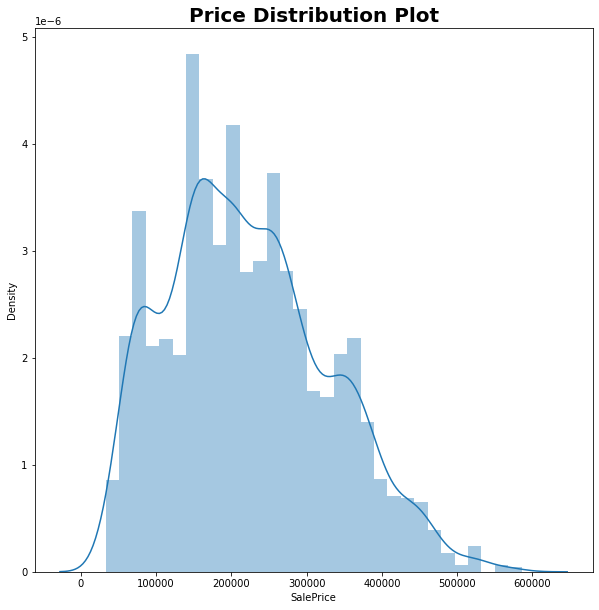

In [218]:
# Plot distribusi fitur 'SalePrice'
plt.figure(figsize = (10,10))
sns.distplot(data['SalePrice'])
plt.title('Price Distribution Plot', size = 20, weight = 'bold')
plt.show()

Berdasarkan plot distribusi harga apartemen diatas, terlihat bahwa terdapat right-skewed distribution. Artinya, terdapat skewness positif pada fitur SalePrice.

In [219]:
# Cek median SalePrice pada tiap Hallway Type
data_median_price = data.groupby(by = ['HallwayType']).agg({'SalePrice':'median'}).reset_index()
data_median_price = data_median_price.set_index('HallwayType')
data_median_price = data_median_price.sort_values('SalePrice', ascending=False)
data_median_price.head()

,SalePrice
HallwayType,
terraced,264601.0
mixed,153539.0
corridor,74557.0


### Data Preprocessing

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [220]:
# Membuat duplikasi dataframe
df_model = data.copy()

In [221]:
# Cek info lebih detail pada setiap fitur
listItem = []

for col in df_model.columns :
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)])
    
df_model_desc = pd.DataFrame(columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                            data = listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,object,0,0.0,3,"[corridor, terraced]"
1,TimeToSubway,object,0,0.0,5,"[5min~10min, no_bus_stop_nearby]"
2,SubwayStation,object,0,0.0,8,"[Daegu, Bangoge]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[1.0, 5.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[2.0, 4.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[605.0, 108.0]"
7,YearBuilt,int64,0,0.0,16,"[2014, 2008]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[7, 1]"
9,Size(sqf),int64,0,0.0,89,"[206, 1690]"


<AxesSubplot:>

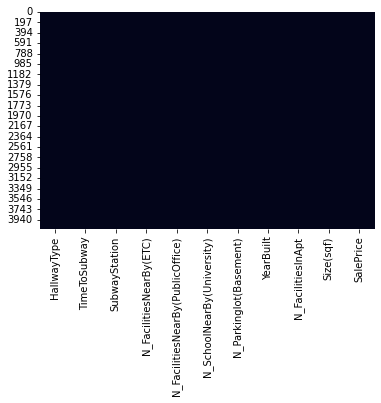

In [222]:
# Missing value heatmap

sns.heatmap(df_model.isnull(), cbar=False)

Berdasarkan info dataset serta heatmap diatas, terlihat bahwa tidak ada fitur yang memiliki missing value. 

Kita juga dapat mengetahui bahwa tidak ada data yang duplikat pada dataset. Oleh karena itu, dataset ini tidak memiliki data yang duplikat. Untuk memastikannya, kita bisa cek dengan menggunakan function duplicated().

In [223]:
# Cek data duplikat
df_model.duplicated().sum()

1422

Terlihat bahwa dataset yang kita miliki terdapat data duplikat sebanyak 1422. Oleh karena itu, kita harus drop data duplikat tersebut untuk menghindari terjadinya bias.

In [224]:
# Drop data duplikat
df_model = df_model.drop_duplicates()

In [225]:
# Memastikan bahwa sudah tidak ada data duplikat
df_model[df_model.duplicated()]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice


Data yang kita miliki sudah tidak terdapat data yang duplikat.

In [226]:
# Cek deskriptif statistik fitur numerikal
df_model.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,1.890411,4.027027,2.680489,533.746390,2002.358386,5.713439,984.028878,229511.365790
std,2.153168,1.887486,1.504470,418.224859,9.151949,2.386552,391.982619,105079.891321
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,181.000000,1993.000000,4.000000,743.000000,153539.000000
50%,1.000000,4.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,221238.000000
75%,5.000000,5.000000,4.000000,798.000000,2007.000000,7.000000,1167.000000,300884.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [227]:
# Cek kembali general info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2701 non-null   object 
 1   TimeToSubway                      2701 non-null   object 
 2   SubwayStation                     2701 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2701 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   float64
 5   N_SchoolNearBy(University)        2701 non-null   float64
 6   N_Parkinglot(Basement)            2701 non-null   float64
 7   YearBuilt                         2701 non-null   int64  
 8   N_FacilitiesInApt                 2701 non-null   int64  
 9   Size(sqf)                         2701 non-null   int64  
 10  SalePrice                         2701 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 253.2+ KB


**Data Correlation**

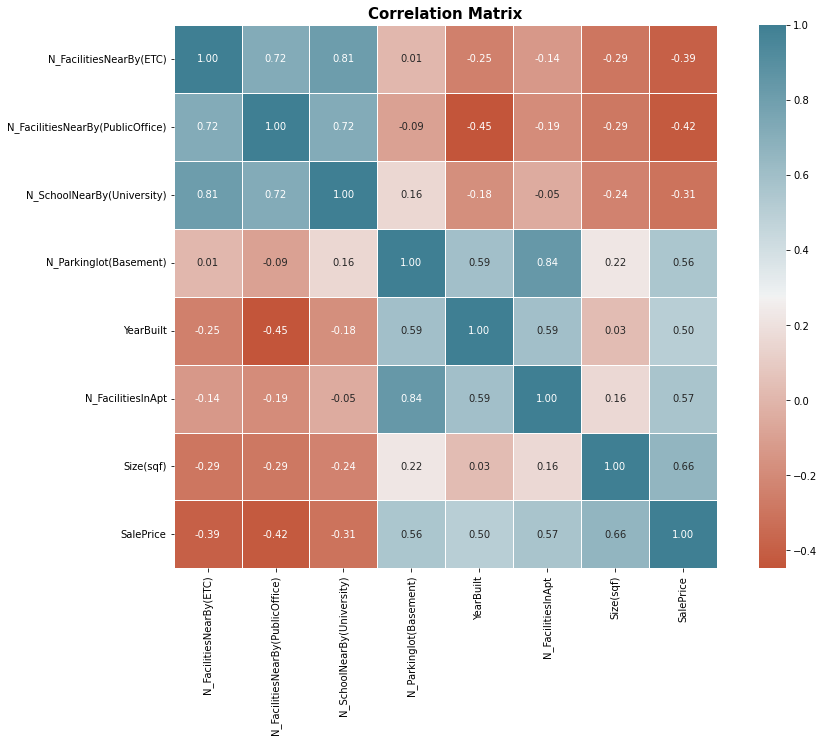

In [228]:
plt.figure(figsize = (15,10))
palette = sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

Pada correlation matrix diatas menunjukkan bahwa terdapat 4 fitur yang memiliki korelasi paling tinggi terhadap fitur 'SalePrice', yaitu fitur 'Size(sqf)', 'N_FacilitiesInApt', 'N_ParkingLot(Basement)', dan 'YearBuilt'. Dimana korelasinya adalah korelasi positif. Ini berarti luas bangunan, fasilitas di dalam apartemen, tempat parkir, serta tahun berdirinya bangunan tersebut memiliki pengaruh yang cukup besar terhadap harga jual apartemen tersebut.

Selanjutnya, kita akan mengecek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang dapat kita lakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

<AxesSubplot:>

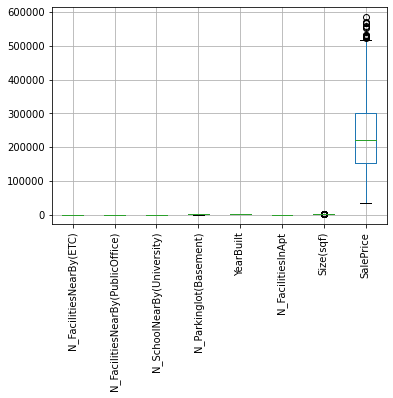

In [229]:
# Boxplot untuk mengecek outliers
df_model.boxplot(rot=90)

Terlihat banyak sekali outliers pada fitur SalePrice. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [230]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print('IQR : {}'.format(iqr))
    
    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print('limit bawah : {}'.format(limit_bawah))
    print('limit_atas : {}'.format(limit_atas))

In [231]:
# Outliers pada fitur SalePrice
find_anomalies(df_model['SalePrice'])

IQR : 147345.0
limit bawah : -67478.5
limit_atas : 521901.5


In [232]:
# Cek deskriptif statistik fitur SalePrice
df_model['SalePrice'].describe()

count      2701.000000
mean     229511.365790
std      105079.891321
min       32743.000000
25%      153539.000000
50%      221238.000000
75%      300884.000000
max      585840.000000
Name: SalePrice, dtype: float64

In [233]:
# Cek SalePrice > $521901.5
df_model[df_model['SalePrice'] > 521901.5].count()['SalePrice']

17

Terlihat bahwa 75% data pada kolom SalePrice bernilai kurang dari 300884, sedangkan nilai maksimalnya adalah 585840. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 17 data yang nilai price-nya lebih besar dari 321.5 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki price lebih besar dari 521901.5 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun. 

Text(0.5, 0, 'Range Selected Price')

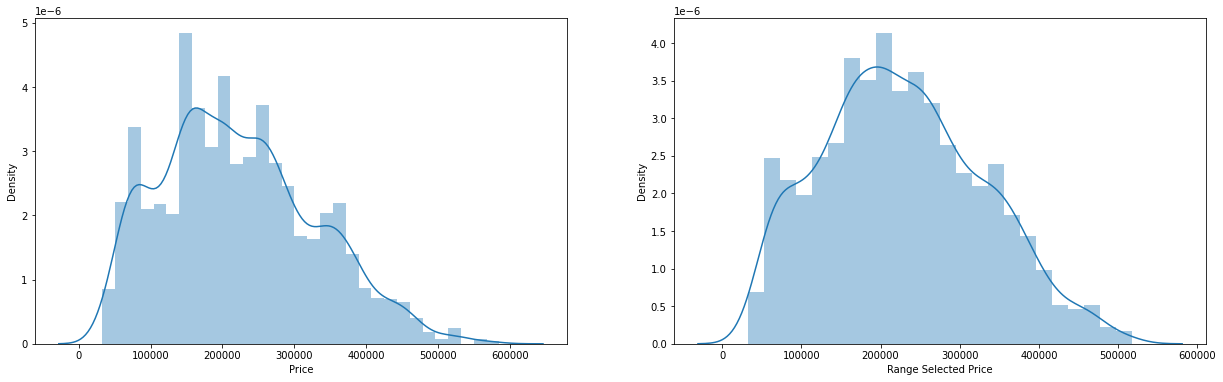

In [234]:
df_model = df_model[(df_model['SalePrice'] <= 521901.5)]

fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(data['SalePrice'], ax=axes[0])
sns.distplot(df_model['SalePrice'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price')

In [235]:
# Cek Deskriptif statistik fitur SalePrice setelah filtering
df_model['SalePrice'].describe()

count      2684.000000
mean     227524.476528
std      102380.847211
min       32743.000000
25%      153097.000000
50%      220088.000000
75%      297455.500000
max      517699.000000
Name: SalePrice, dtype: float64

**Clean Dataset**

In [236]:
# Cek dataset yang sudah bersih
df_model.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [237]:
# Cek kembali general info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2684 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2684 non-null   object 
 1   TimeToSubway                      2684 non-null   object 
 2   SubwayStation                     2684 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2684 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2684 non-null   float64
 5   N_SchoolNearBy(University)        2684 non-null   float64
 6   N_Parkinglot(Basement)            2684 non-null   float64
 7   YearBuilt                         2684 non-null   int64  
 8   N_FacilitiesInApt                 2684 non-null   int64  
 9   Size(sqf)                         2684 non-null   int64  
 10  SalePrice                         2684 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 251.6+ KB


Data akhir yang akan kita gunakan untuk pemodelan kini tersisa 2684 baris. Dimana kurang lebih 35% data sudah tereliminasi sesuai dengan asumsi dan argumen yang disampaikan diproses-proses sebelumnya.

### Modeling

In [238]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [239]:
# Mengubah fitur kategorikal menjadi numerikal
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['HallwayType', 'TimeToSubway', 'SubwayStation'])
], remainder='passthrough')

**Data Splitting**

In [240]:
# Memisahkan data independen variabel dengan target
x = df_model.drop('SalePrice', axis=1)
y = df_model['SalePrice']

**Train and Test Splitting**

In [241]:
# Splitting data training dan test dengan proporsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2020)

**Choose a Benchmark Model**

In [242]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=2020)
rf = RandomForestRegressor(random_state=2020)
xgb = XGBRegressor(random_state=2020)
rd = Ridge(random_state=2020)
las = Lasso(random_state=2020)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_rd = TransformedTargetRegressor(rd, func=np.log, inverse_func=np.exp)
log_las = TransformedTargetRegressor(las, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb, log_rd, log_las]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai metric evaluation
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=2020)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-51645.34810157 -53342.96109897 -55496.9129421  -53488.1797629
 -56700.08725456] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-40809.97124428 -42177.57872018 -44330.09496935 -42164.51860953
 -44380.86593411] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.20234805 -0.21670734 -0.22429319 -0.21619772 -0.21897473] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-48265.15355443 -50130.61485848 -50728.95363573 -46606.78124582
 -49047.79032179] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-37568.31358278 -39305.97842636 -39606.89768486 -37091.55216312
 -39025.06611824] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
 

[-0.20278172 -0.21639961 -0.2239399  -0.21596995 -0.21903268] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Ridge(random_state=2020))
[-109455.92002868 -107482.8381758  -104557.25176157 -107984.42578346
 -103846.15454257] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Lasso(random_state=2020))
[-87803.38000022 -87584.43414481 -84281.5324862  -86447.26761175
 -82395.47729304] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Lasso(random_state=2020))
[-0.50814479 -0.54350629 -0.5317058  -0.53462019 -0.48130179] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Lasso(random_state=2020))


In [243]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model' : ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'Random Forest Regressor', 'XGBoost Regressor', 'Ridge', 'Lasso'],
    'Mean_RMSE' : nilai_mean_rmse,
    'Std_RMSE' : nilai_std_rmse,
    'Mean_MAE' : nilai_mean_mae,
    'Std_MAE' : nilai_std_mae,
    'Mean_MAPE' : nilai_mean_mape,
    'Std_MAPE' : nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-54134.697832,1770.793474,-42772.605895,1384.776865,-0.215704,0.007268
1,KNN Regressor,-48955.858723,1451.041529,-38519.561595,1000.036974,-0.197395,0.005530
2,DecisionTree Regressor,-45906.177118,1485.186657,-36318.483779,1255.091379,-0.185129,0.006862
3,Random Forest Regressor,-45656.051459,1302.259428,-36160.202671,1156.105719,-0.183095,0.006485
4,XGBoost Regressor,-45642.588746,1304.500753,-36192.498868,1165.867673,-0.183283,0.006359
5,Ridge,-54118.672902,1767.990227,-42747.805457,1390.937460,-0.215625,0.007020
6,Lasso,-106665.318058,2125.439725,-85702.418307,2071.984533,-0.519856,0.022545


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE, XGBoost adalah model terbaik. Sedangkan jika berdasarkan nilai MAE dan MAPE, RandomForest memiliki nilai paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan RandomForest. 

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest.

In [244]:
# Benchmark 2 model terbaik
models = {
    'XGB' : XGBRegressor(random_state=2020),
    'RandomForest' : RandomForestRegressor(random_state=2020)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:
    
    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
    ])
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    
score_before_tuning = pd.DataFrame({
    'RMSE' : score_rmse,
    'MAE' : score_mae,
    'MAPE' : score_mape
}, index = models.keys())

score_before_tuning

,RMSE,MAE,MAPE
XGB,45205.681161,37050.358313,0.182827
RandomForest,45148.615704,36981.628100,0.182463


Ketika dilakukan prediksi pada test set, performa RandomForest secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari XGB.


**Hyperparameter Tuning**

Sebelum dilakukan prediksi pada test set, XGB memiliki performa yang lebih baik. Namun, setelah dilakukan prediksi pada test set ternyata RandomForest yang memiliki performa lebih baik dibanding XGB. Selanjutnya, kita akan lakukan hyperparameter tuning pada kedua model untuk melihat perubahan performa mana yang lebih baik sehingga nantinya model inilah yang akan kita gunakan.

**Random Forest**

In [245]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required to each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Hyperparam space random forest
hyperparam_space_rf = {
    'model__n_estimators': n_estimators,
    'model__max_features': max_features,
    'model__max_depth': max_depth,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
    'model__bootstrap': bootstrap
}

In [246]:
# Benchmark model dengan hyperparameter tuning
rf = RandomForestRegressor()

# Membuat algorithm chains
estimator_rf = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', rf)
])

crossval = KFold(n_splits = 5, shuffle=True, random_state=2020)

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf,
    param_distributions = hyperparam_space_rf,
    n_iter = 50,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state=2020
)

In [247]:
# Fitting data training untuk mencari parameter terbaik
random_rf.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType',
                                                                                'TimeToSubway',
                                                                                'SubwayStation'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              RandomForestRegressor())]

In [248]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_rf.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_model__bootstrap,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
24,3.795737,0.109443,0.278409,0.010360,1577,5,2,sqrt,10,False,...,1182.576267,1,-0.181141,-0.193497,-0.201582,-0.188013,-0.190533,-0.190953,0.006701,7
13,4.786738,0.094903,0.308710,0.009112,1788,5,1,sqrt,None,True,...,1169.141313,2,-0.180716,-0.193449,-0.200925,-0.188318,-0.190489,-0.190779,0.006595,5
18,4.376162,0.084914,0.163628,0.003778,944,2,2,auto,50,False,...,1198.896754,5,-0.180960,-0.192309,-0.202058,-0.186922,-0.188158,-0.190081,0.007004,3
2,7.773125,0.176337,0.295236,0.014610,1788,10,2,auto,90,False,...,1139.354308,14,-0.181297,-0.192121,-0.201561,-0.187005,-0.188053,-0.190008,0.006733,1
36,9.382579,0.304779,0.347407,0.009208,2000,10,2,auto,100,False,...,1138.830734,15,-0.181303,-0.192121,-0.201561,-0.187005,-0.188053,-0.190009,0.006731,2


In [249]:
# Cek skor dan params terbaik
print('Random Forest Regressor')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random Forest Regressor
Best_score: -45431.70419409642
Best_params: {'model__n_estimators': 1577, 'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'model__max_features': 'sqrt', 'model__max_depth': 10, 'model__bootstrap': False}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan model Random Forest dan hyperparameter terpilih.

In [250]:
# Model Random Forest
model_rf = {'Random Forest' : RandomForestRegressor(random_state=2020)}

# Define model terhadap estimator terbaik
rf_tuning = random_rf.best_estimator_

# Fitting model
rf_tuning.fit(x_train, y_train)

# Predict test set
y_pred_rf_tuning = rf_tuning.predict(x_test)

# Simpan nilai metrics RMSE, MAE, dan MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

score_after_tuning_rf = pd.DataFrame({'RMSE' : rmse_rf_tuning, 'MAE' : mae_rf_tuning, 'MAPE' : mape_rf_tuning}, index=model_rf.keys())
score_after_tuning_rf

,RMSE,MAE,MAPE
Random Forest,45072.539143,37022.324772,0.182619


**Performance Comparison**

Perbandingan performa model Random Forest sebelum dan sesudah dilakukan hyperparameter tuning.

In [251]:
# Sebelum dan sesudah hyperparameter tuning
print('BEFORE TUNING:')
display(pd.DataFrame(score_before_tuning.loc['RandomForest']).T)

print('AFTER TUNING:')
display(score_after_tuning_rf)

BEFORE TUNING:


,RMSE,MAE,MAPE
RandomForest,45148.615704,36981.6281,0.182463


AFTER TUNING:


,RMSE,MAE,MAPE
Random Forest,45072.539143,37022.324772,0.182619


Model mengalami peningkatan (nilai RMSE berkurang) tetapi juga mengalami penurunan (nilai MAE & MAPE bertambah) setelah dilakukannya hyperparameter tuning.

**XGBoost**

In [252]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [253]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=2020)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [254]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType',
                                                                                'TimeToSubway',
                                                                                'SubwayStation'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=N

In [255]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
22,0.357193,0.024128,0.011054,0.000731,0.7,0.002783,155,4,0.25,8,...,1112.069217,1,-0.181733,-0.193783,-0.199969,-0.186536,-0.187381,-0.189880,0.006337,1
17,0.835558,0.049165,0.018469,0.009122,0.6,0.001,190,5,0.04,9,...,1220.759338,2,-0.180662,-0.193522,-0.201163,-0.187058,-0.188609,-0.190203,0.006850,3
23,0.310770,0.021414,0.014566,0.005077,0.9,3.593814,153,4,0.33,9,...,1175.956911,6,-0.181532,-0.194187,-0.201831,-0.187785,-0.189321,-0.190931,0.006786,10
7,0.619061,0.061551,0.015829,0.008711,0.9,0.059948,119,8,0.05,5,...,1252.466149,3,-0.179596,-0.192235,-0.200915,-0.186885,-0.190078,-0.189942,0.006958,2
3,0.522756,0.051119,0.012611,0.000474,0.5,0.021544,166,8,0.1,9,...,1232.000730,4,-0.181381,-0.196109,-0.201282,-0.186948,-0.188923,-0.190928,0.007001,9


In [256]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -45233.61721558486
Best_params: {'model__subsample': 0.7, 'model__reg_alpha': 0.0027825594022071257, 'model__n_estimators': 155, 'model__max_depth': 4, 'model__learning_rate': 0.25, 'model__gamma': 8, 'model__colsample_bytree': 0.3}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [257]:
# Model XGBoost
model_xgb = {'XGB' : XGBRegressor(random_state=2020)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(x_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(x_test)

# Simpan nilai metrics RMSE, MAE, dan MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning_xgb = pd.DataFrame({'RMSE' : rmse_xgb_tuning, 'MAE' : mae_xgb_tuning, 'MAPE' : mape_xgb_tuning}, index=model_xgb.keys())
score_after_tuning_xgb

,RMSE,MAE,MAPE
XGB,44919.84972,36851.398874,0.181878


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [258]:
# Sebelum dan sesudahhyperparameter tuning
print('BEFORE TUNING:')
display(pd.DataFrame(score_before_tuning.loc['XGB']).T)

print('AFTER TUNING:')
display(score_after_tuning_xgb)

BEFORE TUNING:


,RMSE,MAE,MAPE
XGB,45205.681161,37050.358313,0.182827


AFTER TUNING:


,RMSE,MAE,MAPE
XGB,44919.84972,36851.398874,0.181878


Model mengalami peningkatan performa yang ditandai berkurangnya nilai dari RMSE, MAE, dan MAPE.

**Best Model**

Melakukan perbandingan terhadap kedua model setelah dilakukan hyperparameter tuning.

In [259]:
display(score_after_tuning_rf, score_after_tuning_xgb)

,RMSE,MAE,MAPE
Random Forest,45072.539143,37022.324772,0.182619


,RMSE,MAE,MAPE
XGB,44919.84972,36851.398874,0.181878


Pada hasil skor diatas, model XGBoost menghasilkan nilai yang lebih baik (semakin kecil nilai RMSE, MAE, MAPE). Model inilah yang nantinya akan digunakan untuk memprediksi harga apartemen di kota Daegu.

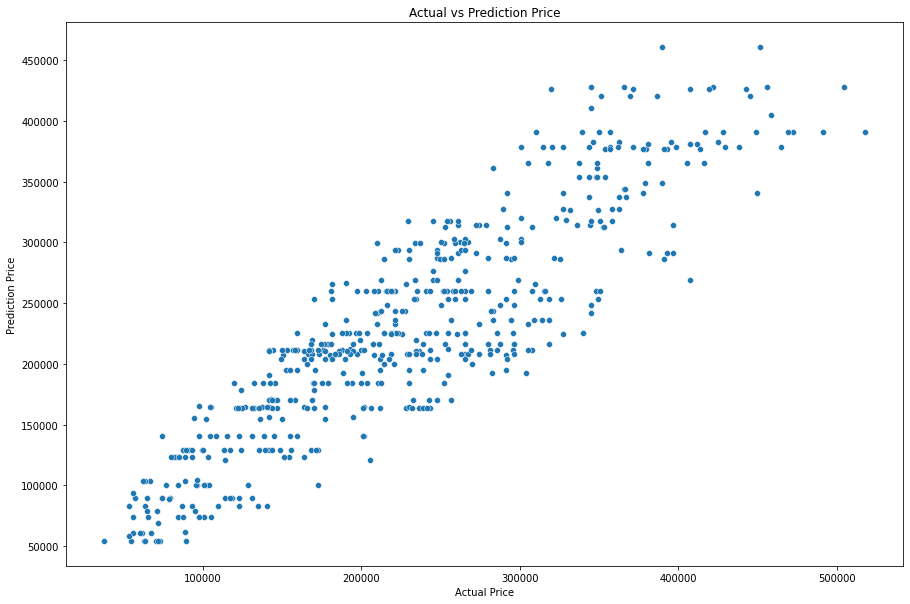

In [260]:
plt.figure(figsize=(15, 10))
plot = sns.scatterplot(x=y_test, y=y_pred).set(title = 'Actual vs Prediction Price',
                                              xlabel = 'Actual Price',
                                              ylabel = 'Prediction Price')

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (SalePrice), kita dapat mengeceknya melalui function feature_importances_.

<AxesSubplot:title={'center':'Feature Importances'}>

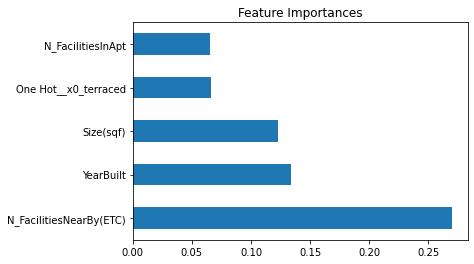

In [261]:
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending=False).head()
feature_imp.plot(kind='barh', title='Feature Importances')

### Conclusion

Berdasarkan pemodelan yang sudah dilakukan, ternyata jumlah fasilitas lain yang terdekat, tahun berdirinya bangunan, serta luas bangunan menjadi aspek penting dalam menentukan harga sewa.

Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai RMSE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar 44919.8, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga listing baru di Daegu pada rentang nilai seperti yang dilatih terhadap model (maksimal harga ₩ 521901), maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar ₩ 44919 dari harga yang mungkin seharusnya. Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh kurangnya fitur pada dataset yang bisa merepresentasikan aspek properti dan juga services.

### Recommendation

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Mengecek prediksi mana saja yang memiliki nilai error yang tinggi. Kita dapat mengelompokkan error tersebut ke dalam grup overestimation dan underestimation, lalu memilih 5% error paling ekstrim saja untuk tiap grup. Nantinya pengelompokkan akan menjadi 3 grup, yaitu overestimation (5%), underestimation (5%), dan grup mayoritas yang error-nya mendekati nilai mean (90%). Setelahnya kita bisa mengecek hubungan antara error tersebut dengan tiap variabel independen. Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering lainnya.
<br><br>   
1. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('SalePrice'), seperti luas kamar, ada atau tidaknya free meals, dan lain-lain. Selain itu, adanya penambahan data terkini untuk Daegu Apartment tentu akan dapat mengimprovisasi kapasitas prediksi dari model.
<br><br>   
3. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih kompleks, seperti recursive neural networks (RNN). Namun, kalau jumlah data dan fiturnya masih seperti dataset ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan.
<br><br> 

****

### Save Model

In [262]:
# Save model
# import pickle

# estimator = Pipeline([('preprocessing', transformer), ('model', XGBRegressor())])
# estimator.fit(x_train, y_train)

# pickle.dump(estimator, open('Model_Daegu_XGB.sav', 'wb'))

In [263]:
# Load model
# filename = 'Model_Daegu_XGB.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [264]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(x_test)))